Universidade Federal de Ciências da Saúde de Porto Alegre

Introdução ao Processamento Digital de Imagens - Informática Biomédica

Maico Triaca Cunha

**Prova Prática**

a) Utilizando as técnicas de morfologia matemática (com as funções criadas por você), execute em python a filtragem dos círculos médios apontados na imagem “Fig0943” do capítulo 9 do livro texto do González. Plote, a imagem original e a imagem filtrada, uma ao lado da outra. Discuta qualitativamente o resultado de sua filtragem. 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
from skimage.draw import circle

%matplotlib inline

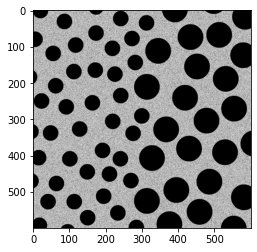

In [4]:
# Recebendo a imagem em escalas de cinza
imagem_original=cv2.imread("Fig943.tif", 0)
plt.imshow(imagem_original, cmap="gray")

In [6]:
def dilatacao(imagem, filtro):
    """
    Função que realizará a técnica de morfologia matemática de dilatação em uma dada imagem,
    a qual será binarizada, com um respectivo filtro (kernel).
    
    Parâmetros
    -----------
    imagem: numpy.array 
        Imagem que sofrerá a modificação
    
    filtro: numpy.array
        Matrix responsável pela alteração na imagem
    
    Return
    -----------
    output_imagem: numpy.array
        Imagem após a técnica de dilatação com seu respectivo filtro
    
    """ 
    # Como estamos lindando com uma imagem binária, seus valores de max e min serão 1 e 0, respectivamente
    max_val=1
    min_val=0
    # Função para binarização da imagem
    _, imgagem_binaria = cv2.threshold(imagem, min_val, max_val, cv2.THRESH_BINARY+cv2.THRESH_OTSU) 
    
    # Dimensões da imagem
    altura, largura=imgagem_binaria.shape
    
    # Capturando a borda da imagem
    limite_borda=(filtro.shape[0]-1)//2
    
    # Declarando a matriz que armanezará a imagem de saída
    output_imagem=np.zeros((altura, largura))
    
    # Operação de dilatação da imagem
    for x in range(limite_borda, altura-limite_borda):
        for y in range(limite_borda, largura-limite_borda):
            # Condição que verifica se houve sobreposição na imagem 
            if np.sum(imgagem_binaria[x-limite_borda: x+limite_borda+1, y-limite_borda: y+limite_borda+1]*filtro) != min_val:
                # Substituição dos valores pelo valor máximo
                output_imagem[x, y]=max_val 
    
    # Redimencionamento da imagem de saída, para retirar as bordas mantidas após a dilatação
    output_imagem=output_imagem[limite_borda:altura-limite_borda, limite_borda:largura-limite_borda]

    return output_imagem

In [7]:
def erosao(imagem, filtro):
    """
    Função que realizará a técnica de morfologia matemática de Erosão em uma dada imagem
    com um respectivo filtro (kernel).
    
    Parâmetros
    -----------
    imagem: numpy.array 
        Imagem que sofrerá a modificação
    
    filtro: numpy.array
        Matrix responsável pela alteração na imagem
    
    Return
    -----------
    output_imagem: numpy.array
        Imagem após a técnica de erosão com seu respectivo filtro
    
    """
    # Dimensões da imagem
    altura, largura=imagem.shape
    
    # Valor máximo da imagem (1, por se tratar de uma imagem binarizada)
    max_val=imagem.max()
    
    # Capturando a borda da imagem
    limite_borda=(filtro.shape[0]-1)//2
    
    # Soma de todos os elementos contidos no Filtro
    filtro_sum=np.sum(filtro)
    
    # Declarando a matriz que armanezará a imagem de saída
    output_imagem=np.zeros((altura, largura))  
    
    # Operação de erosão da imagem
    for x in range(limite_borda, altura-limite_borda):
        for y in range(limite_borda, largura-limite_borda):
            # Condição que verifica se o filtro está sobreposto à uma região da imagem
            if np.sum(imagem[x-limite_borda: x+limite_borda+1, y-limite_borda: y+limite_borda+1]*filtro)==filtro_sum:
                # Substituição dos valores pelo valor máximo
                output_imagem[x, y]=max_val
    
    # Redimencionamento da imagem de saída, para retirar as bordas mantidas após a dilatação
    output_imagem=output_imagem[limite_borda: altura-limite_borda, limite_borda: largura-limite_borda]


    return output_imagem

<ipython-input-8-1688fdfbd894>:4: FutureWarning: `draw.circle` is deprecated in favor of `draw.disk`.`draw.circle` will be removed in version 0.19
  filtro_circular[circle(30, 30, 30)]=1


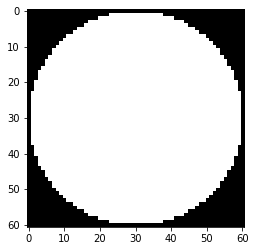

In [8]:
# Declarando o elemento estruturante que será utilizado como filtro nas funções de morfologia matemática
filtro_circular=np.zeros((61, 61))
# O método circle gera um elemento circular. Segundo González, o raio do círculo aconselhado seria de 30 pixels
filtro_circular[circle(30, 30, 30)]=1 

plt.imshow(filtro_circular, cmap="gray")

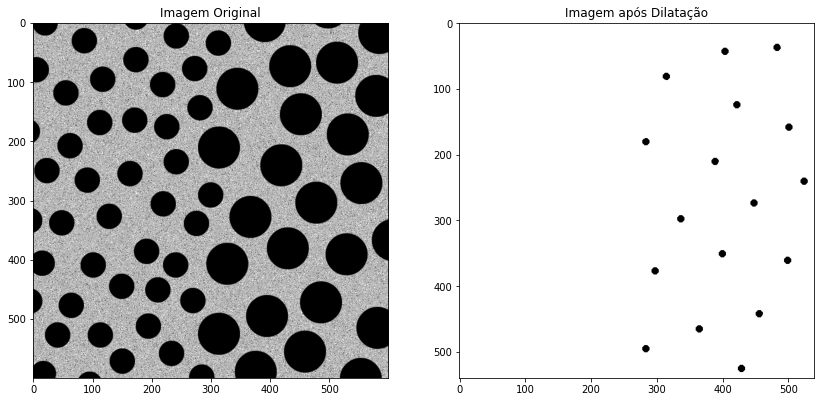

In [9]:
# Chamando a função que realizará a dilatação sob a imagem
imagem_dilatada=dilatacao(imagem_original, filtro_circular)

# Comandos para plot da comparação entre as imagens
fig, ax = plt.subplots(1,2, figsize=(14,14))

ax[0].imshow(imagem_original, cmap="gray")
ax[1].imshow(imagem_dilatada, cmap="gray")

titulos=["Imagem Original",
         "Imagem após Dilatação"]

for obj, title in zip(ax.ravel(), titulos):
    obj.set_title(title, loc="center")

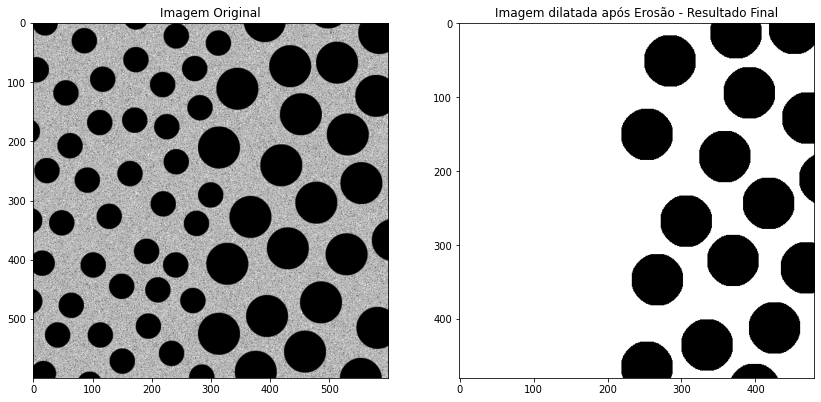

In [10]:
# Chamando a função para realizar a erosão da imagem dilatada
imagem_final=erosao(imagem_dilatada, filtro_circular)

# Comandos para plot da comparação entre as imagens
fig, ax = plt.subplots(1,2, figsize=(14,14))

ax[0].imshow(imagem_original, cmap="gray")
ax[1].imshow(imagem_final, cmap="gray")

titulos=["Imagem Original",
         "Imagem dilatada após Erosão - Resultado Final"]

for obj, title in zip(ax.ravel(), titulos):
    obj.set_title(title, loc="center")

b) Utilizando a convolução 2D (com as funções desenvolvidas por você), execute em python a extração de borda (dos elementos circulares que irão permanecer) da imagem resultante da filtragem executada em a). 

In [11]:
def convolucao_2d(imagem_entrada, filtro, mediana=False):
    """
    Função que fará a convulução de uma dada imagem de acordo com
    o respectivo filtro (kernel).
    
    Parâmetros
    -----------
    imagem: numpy.array 
        Imagem que sofrerá a convolução
    
    filtro: numpy.array
        Matrix responsável pela alteração na imagem
    
    Return
    -----------
    output_convolucao: numpy.array
        Imagem após o processo de convolução com seu respectivo
        filtro
    
    """
    # Aplicando correlação cruzada no filtro = *rotacionar em 180 para convolução*
    filtro=np.flipud(np.fliplr(filtro))
    # Declarando a saída da função
    output_convolucao=np.zeros(imagem_entrada.shape)
    
    # Aplicando zero padding na imagem_entrada para manter suas dimensões em output_convolucao
    imagem_zpadding=np.zeros((imagem_entrada.shape[0]+2, imagem_entrada.shape[1]+2))
    imagem_zpadding[1:-1, 1:-1]=imagem_entrada
    
    # Fazendo a verificação se sera usada a convolução mediana
    if mediana:
        for col in range((imagem_entrada.shape[1])):
            for linha in range((imagem_entrada.shape[0])):
                output_convolucao[linha, col]=np.median(imagem_zpadding[linha:linha+filtro.shape[0], col:col+filtro.shape[1]])
    else:
        # Realizando a operação de Produto Hadamard (element-wise multiplication)
        for col in range((imagem_entrada.shape[1])):
            for linha in range((imagem_entrada.shape[0])):
                output_convolucao[linha, col]=np.multiply(filtro,
                                                          imagem_zpadding[linha:linha+filtro.shape[0], col:col+filtro.shape[1]]).sum()
    return output_convolucao

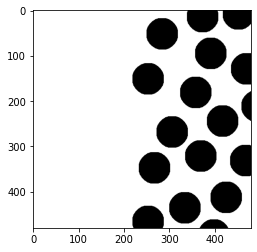

In [24]:
# Conversão da imagem binarizada para uma imagem em escalas de cinza
imagem_final_convertida = (255*imagem_final)

plt.imshow(imagem_final_convertida, cmap="gray")

In [31]:
# Declarando o filtro a ser utilizado
filtro_laplaciano_segunda=np.array([[-1,-1,-1], [-1,8,-1], [-1,-1,-1]])

# Chamando a função de convolução com o respectivo filtro para extração de bordas
imagem_conv_laplaciano = convolucao_2d(imagem_final_convertida, filtro_laplaciano_segunda)

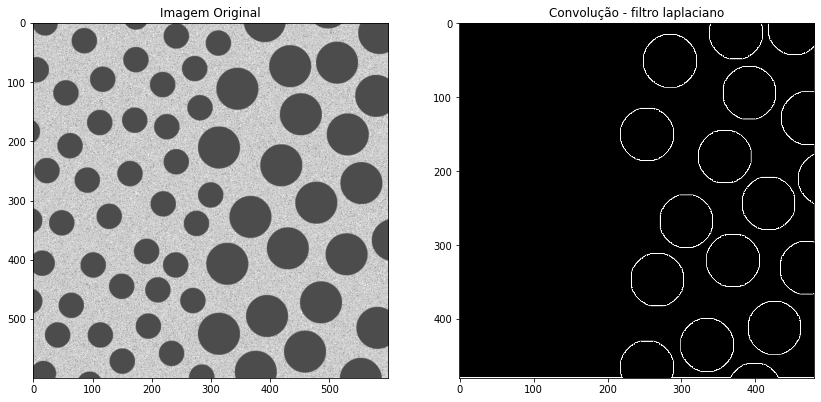

In [32]:
# Comandos para plot da comparação entre as imagens
fig, ax = plt.subplots(1,2, figsize=(14,14))

#OBS: Manter os parâmetros vmin e vmax para não ocorrer uma má interpretação da convolução
ax[0].imshow(imagem_original, cmap="gray", vmin=0, vmax=255)
ax[1].imshow(imagem_conv_laplaciano, cmap="gray", vmin=0, vmax=255)

titulos=["Imagem Original",
         "Convolução - filtro laplaciano"]

for obj, title in zip(ax.ravel(), titulos):
    obj.set_title(title, loc="center")